In [2]:
import numpy as np
from core import utils, manifolds, geodesics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In this example we construct a simple manifold and compute the geodesic curve between two points using several solvers.

- ```solver_bvp```: uses the python scipy bvp5c solver.
- ```solver_fp```: implements the method in
- ```solver_graph```: a heuristic solver based on a graph and a cubic-spline
- ```solver_comb```: a combination of two solvers, where the solution of the solver_2 is used to initialize solver_1

Reference : "Fast and Robust Shortest Paths on Data Learned Riemannian Manifolds", G. Arvanitidis, et. al., AISTATS 2019.

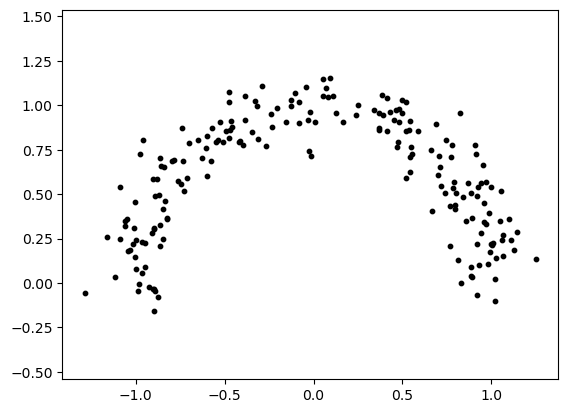

In [4]:
# Construct an artificial data set
data_params = {'N': 200, 'data_type': 1, 'sigma': 0.1}
data = utils.generate_data(data_params)
utils.my_plot(data, c='k', s=10)
plt.show()

In [6]:
# Construct a Riemannian metric from the data
manifold = manifolds.LocalDiagPCA(data=data, sigma=0.15, rho=1e-3)

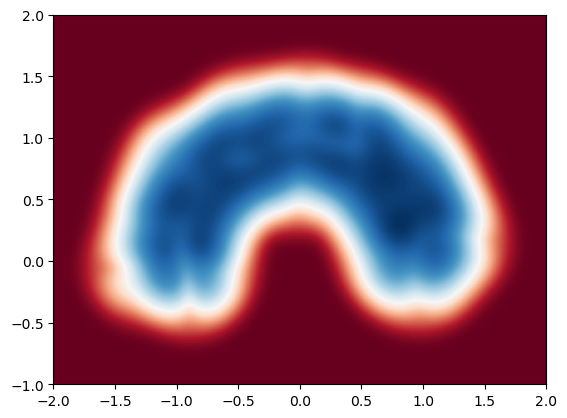

In [11]:
# Plot the Riemannian volume element
utils.plot_measure(manifold, np.linspace(-2, 2, 100), np.linspace(-1, 2, 100))
plt.axis('image')
plt.show()

In [12]:
# Initialize the geodesic solvers
N_nodes = 30
solver_bvp = geodesics.SolverBVP(NMax=1000, tol=1e-1)
solver_fp = geodesics.SolverFP(D=2, N=10, tol=1e-1)
__cluster_centers = KMeans(n_clusters=N_nodes, n_init=30, max_iter=1000).fit(data).cluster_centers_
solver_graph = geodesics.SolverGraph(manifold, data=__cluster_centers, kNN_num=int(np.log(N_nodes)), tol=1e-2)
solver_comb = geodesics.SolverComb(solver_1=solver_bvp, solver_2=solver_graph)

Kernel type has not been specified (default: Squared Exponential).

[Initialize Graph] [Processed point: 0/30]


In [13]:
# Compute the shortest path between two points
c0 = utils.my_vector([-1, 0])
c1 = utils.my_vector([1, 0])

In [15]:
curve_bvp, logmap_bvp, curve_length_bvp, failed_bvp, solution_bvp \
                = geodesics.compute_geodesic(solver_bvp, manifold, c0, c1)

Geodesic solver (bvp) failed!


In [16]:
curve_fp, logmap_fp, curve_length_fp, failed_fp, solution_fp \
                = geodesics.compute_geodesic(solver_fp, manifold, c0, c1)

In [17]:
curve_graph, logmap_graph, curve_length_graph, failed_graph, solution_graph \
                = geodesics.compute_geodesic(solver_graph, manifold, c0, c1)

In [19]:
curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)

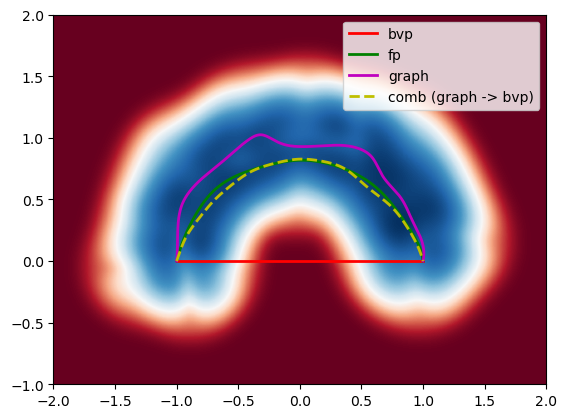

In [20]:
utils.plot_measure(manifold, np.linspace(-2, 2, 100), np.linspace(-1, 2, 100))
geodesics.plot_curve(curve_bvp, c='r', linewidth=2, label='bvp')
geodesics.plot_curve(curve_fp, c='g', linewidth=2, label='fp')
geodesics.plot_curve(curve_graph, c='m', linewidth=2, label='graph')
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
plt.axis('image')
plt.legend()
plt.show()


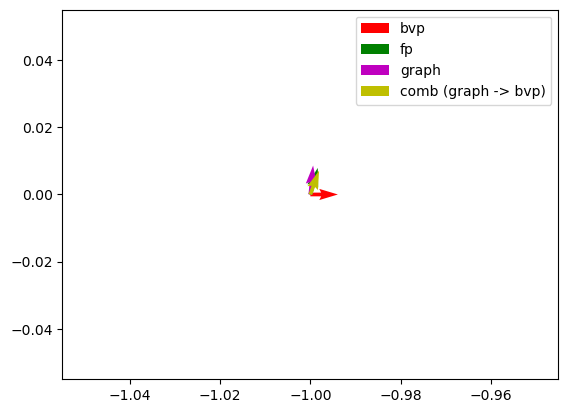

In [29]:
# Compare the logarithmic maps
plt.figure()
plt.quiver(c0[0, 0], c0[1, 0], logmap_bvp[0, 0], logmap_bvp[1, 0], color='r', label='bvp')
plt.quiver(c0[0, 0], c0[1, 0], logmap_fp[0, 0], logmap_fp[1, 0], color='g', label='fp')
plt.quiver(c0[0, 0], c0[1, 0], logmap_graph[0, 0], logmap_graph[1, 0], scale=100, color='m', label='graph')
plt.quiver(c0[0, 0], c0[1, 0], logmap_comb[0, 0], logmap_comb[1, 0], scale=100, color='y', label='comb (graph -> bvp)')
plt.legend()
plt.show()

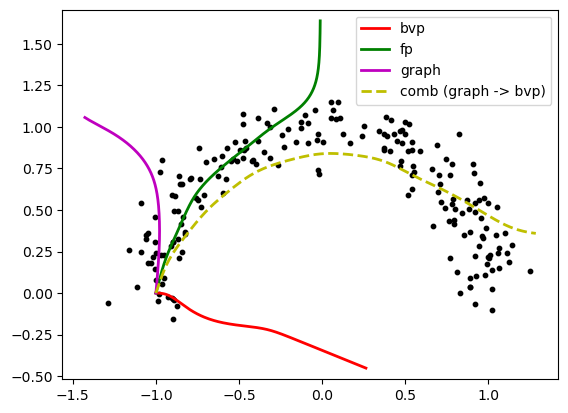

In [25]:
# Compare the exponential map
plt.figure()
utils.my_plot(data, c='k', s=10)
curve_expmap_bvp, failed_expmap_bvp = geodesics.expmap(manifold, c0, logmap_bvp)
geodesics.plot_curve(curve_expmap_bvp, c='r', linewidth=2, label='bvp')
curve_expmap_fp, failed_expmap_fp = geodesics.expmap(manifold, c0, logmap_fp)
geodesics.plot_curve(curve_expmap_fp, c='g', linewidth=2, label='fp')
curve_expmap_graph, failed_expmap_graph = geodesics.expmap(manifold, c0, logmap_graph)
geodesics.plot_curve(curve_expmap_graph, c='m', linewidth=2, label='graph')
curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, logmap_comb)
geodesics.plot_curve(curve_expmap_comb, c='y', linewidth=2, linestyle='--', label='comb (graph -> bvp)')
plt.legend()
plt.show()

In [26]:
# Print results:
print('===== Solvers result =====')
print('[BVP solver] [Failed: ' + str(failed_bvp) + '] [Length: ' + str(np.round(curve_length_bvp, 2)) + ']')
print('[FP solver] [Failed: ' + str(failed_fp) + '] [Length: ' + str(np.round(curve_length_fp, 2)) + ']')
print('[GRAPH solver] [Failed: ' + str(failed_graph) + '] [Length: ' + str(np.round(curve_length_graph, 2)) + ']')
print('[COMB solver] [Failed: ' + str(failed_comb) + '] [Length: ' + str(np.round(curve_length_comb, 2)) + ']')


===== Solvers result =====
[BVP solver] [Failed: True] [Length: 24.16]
[FP solver] [Failed: False] [Length: 5.15]
[GRAPH solver] [Failed: False] [Length: 5.86]
[COMB solver] [Failed: False] [Length: 5.12]
